In [1]:
import os
import tensorflow as tf

# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [3]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [4]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [5]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

In [6]:
#content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
content_path = 'C:/Users/deaston/Pictures/CSC_0239.JPG'
#style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')
#style_path = tf.keras.utils.get_file('guernica.jpg','https://warriorgirl3.files.wordpress.com/2014/08/guernica.jpg')
style_path = tf.keras.utils.get_file('salvidor.jpg','https://blog.artsper.com/wp-content/uploads/2019/07/la-persistance-de-la-me%CC%81moire.png')
#style_path = tf.keras.utils.get_file('sistine.jpg','https://cdn.britannica.com/s:700x500/41/3341-050-825E2B57/The-Creation-of-Adam-ceiling-fresco-Sistine.jpg')
#style_path = tf.keras.utils.get_file('mona-lisa.jpg','https://cdn.shopify.com/s/files/1/1414/2472/files/1-_604px-Mona_Lisa__by_Leonardo_da_Vinci__from_C2RMF_retouched.jpg?v=1558424691')
#style_path = tf.keras.utils.get_file('Kiss_of_Judas.jpg','https://cdn.shopify.com/s/files/1/1414/2472/files/6-Giotto_-_Scrovegni_-_-31-_-_Kiss_of_Judas-compressor.jpg?v=1558424997')
#style_path = tf.keras.utils.get_file('Madonna_Sixtina.jpg','https://cdn.shopify.com/s/files/1/1414/2472/files/8-657px-RAFAEL_-_Madonna_Sixtina__Gemaldegalerie_Alter_Meister__Dresden__1513-14._Oleo_sobre_lienzo__265_x_196_cm.jpg?v=1558428497')

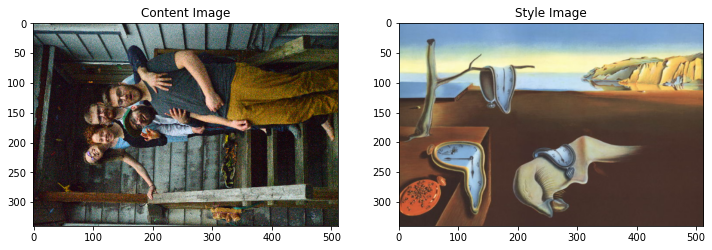

In [7]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

In [ ]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

 24215552/574710816 [>.............................] - ETA: 14:31

In [ ]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]